In [1]:
import cv2
import glob

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2021-10-01 08:53:09.558472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-01 08:53:09.558511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Num GPUs Available:  0


2021-10-01 08:53:11.767837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-01 08:53:11.767866: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-01 08:53:11.767891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chispitas-15-bs0xx): /proc/driver/nvidia/version does not exist


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12566678134757070153
]


2021-10-01 08:53:11.774266: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#https://www.tensorflow.org/
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

#https://github.com/ipeaGIT/geobr
#https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
#https://zhiyzuo.github.io/Plot-Lorenz/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#sparsearray
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
import csv
#import qgrid
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes
#https://github.com/pandas-profiling/pandas-profiling

#import geopandas #pip install geopandas https://geopandas.org/index.html
import pingouin as pg
import scipy
#from pca import pca #pip install pca https://github.com/erdogant/pca
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib

import ast #Tranfromer un dictioner
    
#import dask.dataframe as dd
#%pip  install "dask[complete]"
#!pip  install "dask[complete]"

dirDATA = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/'
dirIMAGES = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/Images/'
dirCLEAN = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Cleaning/'
dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
dirIMAGES = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/Images0/'


dir_flipkart= dirDATA + 'flipkart_com-ecommerce_sample_1050.csv'

In [5]:
dfImagesCAT = pd.read_csv(dirCV+'dfDATA_Clean.csv', encoding='utf-8', index_col=0) #, delimiter='\t', lineterminator="\n", 
dfImagesCAT

,image,product_category_tree_0
uniq_id,,
55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,home furnishing
7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,baby care
d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,home furnishing
6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,home furnishing
893aa5ed55f7cff2eccea7758d7a86bd,893aa5ed55f7cff2eccea7758d7a86bd.jpg,watches
...,...,...
be0f39341d771aac57084970f1ed6425,be0f39341d771aac57084970f1ed6425.jpg,baby care
958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,baby care
fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,baby care


# STYLE Graph

In [6]:
#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [10,8]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
#plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 2

#Scatter marker
plt.rcParams['scatter.marker'] = 'o'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# VGG16

In [7]:
from keras.applications import vgg16
#from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

## Training and Test Set split

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(dfImagesCAT[dfImagesCAT.columns.difference([])], dfImagesCAT['product_category_tree_0'], test_size=0.2, random_state=0)
Xtrain, Xval, ytrain, yval= train_test_split(Xtrain[Xtrain.columns.difference([])], Xtrain['product_category_tree_0'], test_size=0.2, random_state=0)


Xtrain

,image,product_category_tree_0
uniq_id,,
aab46b84f70cc6774afaafe1d6035de3,aab46b84f70cc6774afaafe1d6035de3.jpg,kitchen & dining
a1fa0e24b2249ffa81f688c4840f1eb8,a1fa0e24b2249ffa81f688c4840f1eb8.jpg,beauty and personal care
eaf55e90d0e4295cb84cb0276e78c35c,eaf55e90d0e4295cb84cb0276e78c35c.jpg,beauty and personal care
4946e2411d24801b9e8f7dbe97ab1b93,4946e2411d24801b9e8f7dbe97ab1b93.jpg,home decor & festive needs
5307e0db12b1018746ac3801d189c379,5307e0db12b1018746ac3801d189c379.jpg,home decor & festive needs
...,...,...
01089dc3618a0ab7304d784ef400b83d,01089dc3618a0ab7304d784ef400b83d.jpg,computers
5a5bb03499009f35759258263fc834a3,5a5bb03499009f35759258263fc834a3.jpg,computers
43da6e88dcb61e027ea9112cfab158ee,43da6e88dcb61e027ea9112cfab158ee.jpg,home furnishing


In [9]:
datagen_train = ImageDataGenerator(rescale=1./255,
                             horizontal_flip=True, 
                             vertical_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rotation_range=20,
                            ) #validation_split

datagen_val = ImageDataGenerator(rescale=1./255)

batch_train = 10
batch_valid = batch_train

tfTrain = datagen_train.flow_from_dataframe(Xtrain, directory=dirIMAGES, x_col='image', y_col='product_category_tree_0',
                                      target_size=(224, 224), color_mode='rgb',
                                      classes=None ,class_mode='categorical', batch_size=batch_train, 
                                      shuffle=True)

tfValidation = datagen_val.flow_from_dataframe(Xval, directory=dirIMAGES, x_col='image', y_col='product_category_tree_0',
                                          target_size=(224,224), color_mode='rgb', 
                                          classes=None ,class_mode='categorical', batch_size=batch_valid, 
                                          shuffle=True)

tfTest = datagen_val.flow_from_dataframe(Xtest, directory=dirIMAGES, x_col='image', y_col='product_category_tree_0',
                                          target_size=(224,224), color_mode='rgb', 
                                          classes=None ,class_mode='categorical', batch_size=batch_valid, 
                                          shuffle=False)


Found 552 validated image filenames belonging to 7 classes.
Found 139 validated image filenames belonging to 7 classes.
Found 173 validated image filenames belonging to 7 classes.


In [10]:
# COMO SAVOIR LE NBR DIMAGES DU tfTrain? c'est quel data type? Il y a un data cheet du Tf ou Keras?

In [11]:
dClasses = tfValidation.class_indices
dClasses

{'baby care': 0,
 'beauty and personal care': 1,
 'computers': 2,
 'home decor & festive needs': 3,
 'home furnishing': 4,
 'kitchen & dining': 5,
 'watches': 6}

## VGG16 base model pre-trained on ImageNet dataset

In [12]:
model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3)) #pooling='avg'
#base_model.summary()

## freeze the classification layers in the base model

In [13]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in model.layers : #[:-5]:
    layer.trainable = False

#base_model.summary()

In [14]:
# use “get_layer” method to save the last layer of the network
last_layer = model.get_layer('block5_pool')

# save the output of the last layer to be the input of the next layer
last_output = last_layer.output

x = Flatten()(last_output)

# add our new softmax layer with 3 hidden units
x = Dense(7, activation='softmax', name='softmax')(x)

# instantiate a new_model using keras’s Model class
new_model = Model(inputs=model.input, outputs=x)

# print the new_model summary
#new_model.summary()


In [15]:
# compile the model 
new_model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
#new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
STEP_TRAIN = len(Xtrain)//batch_train
STEP_VALD = len(Xval)//batch_valid

2021-10-01 08:56:43.246486: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
18/55 [========>.....................] - ETA: 1:35 - loss: 2.4553 - accuracy: 0.3111

/home/chispitas/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2911: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


55/55 [==============================] - 176s 3s/step - loss: 1.8775 - accuracy: 0.4631 - val_loss: 1.0337 - val_accuracy: 0.6923

Epoch 00001: val_accuracy improved from -inf to 0.69231, saving model to /media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/signlanguage.model.hdf5
Epoch 2/20
55/55 [==============================] - 172s 3s/step - loss: 1.0559 - accuracy: 0.6624 - val_loss: 0.9107 - val_accuracy: 0.7308

Epoch 00002: val_accuracy improved from 0.69231 to 0.73077, saving model to /media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/signlanguage.model.hdf5
Epoch 3/20
55/55 [==============================] - 176s 3s/step - loss: 0.6930 - accuracy: 0.7860 - val_loss: 0.8263 - val_accuracy: 0.7462

Epoch 00003: val_accuracy improved from 0.73077 to 0.74615, saving model to /media/chispitas/DATOS/Documento/Estudios/DataScientis

<Figure size 1440x864 with 0 Axes>

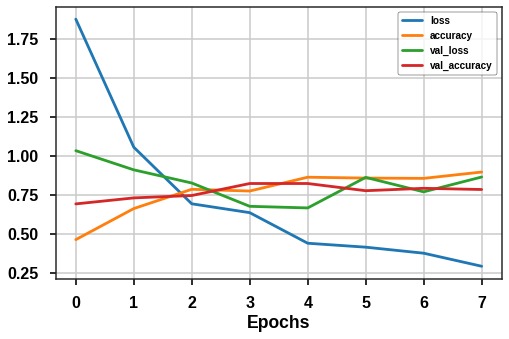

In [18]:
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
metric = 'val_accuracy'

early_stopping = EarlyStopping(monitor=metric, patience=4, verbose=1) #, min_delta=0.0

checkpointer = ModelCheckpoint(filepath=dirCV+'signlanguage.model.hdf5', monitor=metric, verbose=1,
                               save_best_only=True, save_weights_only=False, mode='auto') #, save_freq=batch_train

#val_generator = val_dataset.generate(batch_size=batch_size,shuffle=False,transformations=[],label_encoder=ssd_input_encoder,
                                    #returns={'processed_images','encoded_labels'},keep_images_without_gt=False)
    
history=new_model.fit(tfTrain,
                      steps_per_epoch=STEP_TRAIN,
                      epochs=20,
                      validation_data=tfValidation,
                      validation_steps=STEP_VALD,
                      verbose=1,
                      callbacks=[checkpointer, early_stopping]
                    ) 

fig = plt.figure(figsize=(20,12))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
x = Dense(256, activation="relu")(x)
fig.savefig(dirCV + 'VGG16.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [19]:
new_model.load_weights(dirCV+'signlanguage.model.hdf5')

In [20]:
new_model.evaluate(tfTest)

18/18 [==============================] - 54s 3s/step - loss: 1.0557 - accuracy: 0.7168


[1.0556737184524536, 0.7167630195617676]

new_model.evaluate_generator(generator=tfValidation, steps=STEP_VALD)

new_model.evaluate(tfValidation)

## Confusion matrix

In [21]:
dClasses = tfTest.class_indices
dClasses = dict((v,k) for k,v in dClasses.items()) #Exange key and values
#Translate: np.vectorize(dClasses.get)(y_pred)
dClasses

{0: 'baby care',
 1: 'beauty and personal care',
 2: 'computers',
 3: 'home decor & festive needs',
 4: 'home furnishing',
 5: 'kitchen & dining',
 6: 'watches'}

In [22]:
y_pred0 = new_model.predict(tfTest)
y_pred = np.argmax(y_pred0,axis=1)
#y_pred = np.vectorize(dClasses.get)(y_pred)
y_pred

array([5, 1, 0, 4, 0, 4, 4, 1, 3, 2, 4, 3, 2, 6, 0, 1, 3, 5, 6, 0, 2, 3,
       2, 3, 0, 4, 5, 5, 0, 0, 6, 0, 3, 1, 3, 3, 2, 3, 0, 5, 0, 1, 0, 3,
       4, 1, 6, 0, 3, 4, 4, 2, 1, 3, 1, 1, 4, 4, 5, 6, 5, 1, 6, 1, 3, 0,
       3, 1, 0, 6, 3, 3, 0, 3, 1, 5, 0, 3, 2, 3, 1, 5, 6, 6, 0, 4, 0, 0,
       4, 0, 0, 5, 3, 6, 5, 4, 2, 6, 0, 2, 0, 5, 1, 5, 0, 4, 0, 0, 1, 2,
       1, 2, 5, 5, 1, 2, 1, 2, 3, 0, 3, 2, 4, 6, 0, 1, 6, 0, 3, 0, 2, 2,
       4, 1, 0, 3, 3, 0, 0, 5, 3, 1, 0, 4, 2, 4, 5, 3, 2, 1, 5, 2, 0, 5,
       5, 3, 1, 3, 0, 4, 2, 4, 5, 3, 2, 4, 0, 2, 1, 5, 5, 3, 6])

In [23]:
y_label = np.array(tfTest.labels)
#y_label = np.vectorize(dClasses.get)(y_label)
y_label

array([5, 1, 0, 0, 0, 4, 3, 1, 2, 2, 4, 3, 5, 6, 0, 1, 3, 5, 6, 0, 2, 3,
       2, 5, 0, 4, 5, 5, 4, 0, 6, 0, 3, 1, 1, 6, 2, 3, 0, 2, 0, 1, 4, 3,
       4, 2, 6, 0, 0, 4, 0, 2, 3, 3, 2, 1, 4, 4, 5, 6, 5, 1, 6, 0, 3, 0,
       4, 1, 4, 4, 4, 3, 0, 4, 1, 5, 0, 3, 2, 4, 4, 5, 6, 6, 0, 4, 4, 0,
       3, 0, 0, 5, 6, 6, 2, 4, 2, 6, 4, 2, 4, 5, 2, 1, 0, 4, 0, 0, 0, 2,
       1, 2, 0, 5, 5, 2, 1, 2, 3, 5, 3, 2, 4, 6, 5, 3, 6, 4, 3, 0, 2, 2,
       0, 2, 0, 3, 0, 3, 0, 5, 3, 1, 4, 0, 2, 4, 5, 3, 2, 5, 5, 2, 0, 3,
       5, 3, 1, 3, 0, 4, 2, 4, 5, 2, 2, 4, 0, 0, 4, 5, 5, 3, 6])

In [24]:
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_label, y_pred)
score = str(score.round(2))
score

'0.72'

In [25]:
from sklearn.metrics import confusion_matrix
npConfusionM = confusion_matrix(y_label, y_pred)

In [26]:
dfConfusionM = pd.DataFrame(npConfusionM)
dfConfusionM.columns = list(dClasses.values())
dfConfusionM.index = list(dClasses.values())

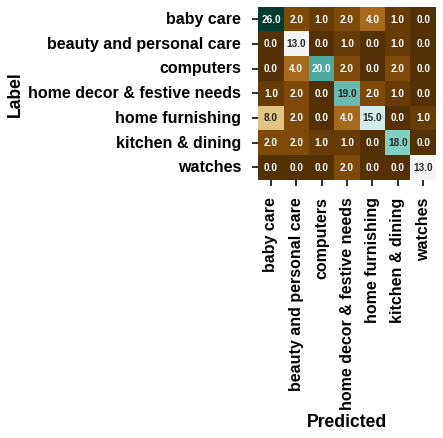

In [27]:
plt.rcParams["figure.figsize"] = [len(dfConfusionM)/2.2,len(dfConfusionM)/2.2]
heatmap = sns.heatmap(dfConfusionM,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
heatmap.set(xlabel='Predicted', ylabel='Label') #title='Accuracy:'+score
plt.savefig(dirCV + '3-dfConfusionM-Keras.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

In [28]:
STOOPPP

NameError: name 'STOOPPP' is not defined

# OPEN CV

## Pre-Processing

In [ ]:
import cv2
import glob

In [ ]:
#https://github.com/ipeaGIT/geobr
#https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
#https://zhiyzuo.github.io/Plot-Lorenz/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#sparsearray
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
import csv
#import qgrid
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes
#https://github.com/pandas-profiling/pandas-profiling

#import geopandas #pip install geopandas https://geopandas.org/index.html
import pingouin as pg
import scipy
#from pca import pca #pip install pca https://github.com/erdogant/pca
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib

import ast #Tranfromer un dictioner
    
#import dask.dataframe as dd
#%pip  install "dask[complete]"
#!pip  install "dask[complete]"

dirDATA = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/'
dirIMAGES = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/Images/'
dirCLEAN = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Cleaning/'
dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
dirIMAGES = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart/Images0/'


dir_flipkart= dirDATA + 'flipkart_com-ecommerce_sample_1050.csv'

In [ ]:
dfImagesCAT = pd.read_csv(dirCV+'dfDATA_Clean.csv', encoding='utf-8', index_col=0) #, delimiter='\t', lineterminator="\n", 
dfImagesCAT

# STYLE Graph

In [ ]:
#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [10,8]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
#plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 2

#Scatter marker
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

## Pre-Processing

In [ ]:
def A2B(npImagesA, npImagesB,name):
    dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
    plt.style.use('seaborn-notebook') 

    nc = 6
    nf = 2

    fig = plt.figure(figsize=(15*nc/2, 15*nf/2))
    plt.subplots_adjust(wspace=0.1, hspace=0.1) #interspace entre graphiques

    cc = -1
    for i in range(0,6):
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(npImagesA[i], cmap='gray')
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(npImagesB[i], cmap='gray')
        #ax.set_title('')
        #ax.set_ylabel('')
        #ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirCV + name+'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

glob.glob(dirIMAGES+'*.jpg')

In [ ]:
lImages = []

for img in dfImagesCAT['image']:
    lImages.append(dirIMAGES+img)
len(lImages)

import cv2
import glob
npImagesA = [cv2.imread(imag) for imag in glob.glob(dirIMAGES+'*.jpg')]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesA[::int(len(npImagesA)/6)], 'name')

In [ ]:
npImagesA = [cv2.imread(imag) for imag in lImages]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesA[::int(len(npImagesA)/6)], 'original')

In [ ]:
npImagesB = [cv2.cvtColor(npImagesA[i], cv2.COLOR_BGR2RGB) for i in range(0,len(npImagesA))]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'RGB')

In [ ]:
npImagesA = npImagesB

npImagesB = [cv2.cvtColor(npImagesA[i], cv2.COLOR_RGB2GRAY) for i in range(0,len(npImagesA))]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'GRAY')

### Scaling 

In [ ]:
npImagesA = npImagesB

# Récupérer et afficher la taille de l'image (en pixels)
npW = np.zeros(len(npImagesA))
npH = np.zeros(len(npImagesA))

for i in range(0,len(npImagesA)):
    npW[i] = npImagesA[i].shape[0]
    npH[i] = npImagesA[i].shape[1]
dfSIZE = pd.DataFrame([npW,npH], index=['W','H']).T

In [ ]:
fig = plt.figure()
sns.boxplot(data=dfSIZE, showfliers=False, showmeans = True)
plt.show()
#ax.set_yscale('log')
fig.savefig(dirCV + '1-BoxPlot_Scaling.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [ ]:
dfSIZE.median()

In [ ]:
npImagesA = npImagesB

npImagesB = [cv2.resize(npImagesA[i], (int(dfSIZE.median()[0]), int(dfSIZE.median()[1])), interpolation=cv2.INTER_LINEAR) for i in range(0,len(npImagesA))]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'resize')

### Gaussian filtering

In [ ]:
npImagesA = npImagesB

npImagesB = [cv2.GaussianBlur(npImagesA[i], (9,9), 1000) for i in range(0,len(npImagesA))]
A2B(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'Gauss')

### Histogram equalization

In [ ]:
def GrayHIST(npImagesA, npImagesB,name):
    dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
    plt.style.use('seaborn-notebook') 

    nc = 4
    nf = 6

    fig = plt.figure(figsize=(15*nc/2, 15*nf/2))
    plt.subplots_adjust(wspace=0.1, hspace=0.1) #interspace entre graphiques

    cc = -1
    for i in range(0,6):
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(npImagesA[i], cmap='gray')
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        hist = cv2.calcHist([npImagesA[i]], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(npImagesB[i], cmap='gray')
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        gray_image_eq = cv2.equalizeHist(npImagesB[i])
        hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])
        ax = plt.plot(hist_eq)
        #ax.set_title('')
        #ax.set_ylabel('')
        #ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirCV + name+'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

npImagesA = npImagesB

npImagesB = [cv2.equalizeHist(npImagesB[i]) for i in range(0,len(npImagesA))]
GrayHIST(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'name')

### CLAHE

In [ ]:
def GrayCLAHE(npImagesA, pImagesNormal, name):
    dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
    plt.style.use('seaborn-notebook') 

    nc = 5
    nf = 6

    fig = plt.figure(figsize=(15*nc/2, 15*nf/2))
    plt.subplots_adjust(wspace=0.1, hspace=0.1) #interspace entre graphiques

    cc = -1
    for i in range(0,6):
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(npImagesA[i], cmap='gray')
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = plt.imshow(pImagesNormal[i], cmap='gray')

        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe = cv2.createCLAHE(clipLimit=1.1)
        gray_image_clahe = clahe.apply(npImagesA[i])
        ax = plt.imshow(gray_image_clahe, cmap='gray')

        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe.setClipLimit(1.5)
        gray_image_clahe = clahe.apply(npImagesA[i])
        ax = plt.imshow(gray_image_clahe, cmap='gray')

        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe.setClipLimit(3)
        gray_image_clahe = clahe.apply(npImagesA[i])
        ax = plt.imshow(gray_image_clahe, cmap='gray')

        #ax.set_title('')
        #ax.set_ylabel('')
        #ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirCV + name+'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [ ]:
def GrayCLAHEhist(npImagesA, pImagesNormal, name):
    dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
    plt.style.use('seaborn-notebook') 

    nc = 5
    nf = 6

    fig = plt.figure(figsize=(15*nc/2, 15*nf/2))
    plt.subplots_adjust(wspace=0.1, hspace=0.1) #interspace entre graphiques

    cc = -1
    for i in range(0,6):
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        hist = cv2.calcHist([npImagesA[i]], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        hist = cv2.calcHist([pImagesNormal[i]], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe = cv2.createCLAHE(clipLimit=1.1)
        gray_image_clahe = clahe.apply(npImagesA[i])
        hist = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe.setClipLimit(1.5)
        gray_image_clahe = clahe.apply(npImagesA[i])
        hist = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        cc = cc + 1
        ax = fig.add_subplot(nf, nc, (cc+1))
        clahe.setClipLimit(3)
        gray_image_clahe = clahe.apply(npImagesA[i])
        hist = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])
        ax = plt.plot(hist)
        
        #ax.set_title('')
        #ax.set_ylabel('')
        #ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirCV + name+'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [ ]:
GrayCLAHE(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'Clahe')

In [ ]:
GrayCLAHEhist(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'Clahe-hist')

In [ ]:
npImagesA = npImagesB

npImagesB = [cv2.createCLAHE(clipLimit=3).apply(npImagesB[i]) for i in range(0,len(npImagesA))]
GrayHIST(npImagesA[::int(len(npImagesA)/6)], npImagesB[::int(len(npImagesB)/6)], 'GuassTOclahe')

## Contour Detection

In [ ]:
npImagesA = npImagesB

In [ ]:
def A2B_features(npImagesB,BoVW,name):
    dirCV = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/CV/'
    plt.style.use('seaborn-notebook') 

    nc = 3
    nf = 2

    fig = plt.figure(figsize=(15*nc/2, 15*nf/2))
    plt.subplots_adjust(wspace=0.1, hspace=0.1) #interspace entre graphiques

    cc = -1
    for i in range(0,6):
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        image_keypoints = cv2.drawKeypoints(npImagesB[i], BoVW[i][0], None, color=(255, 0, 255), flags=0)
        ax = plt.imshow(image_keypoints, cmap='gray')

        #ax.set_title('')
        #ax.set_ylabel('')
        #ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirCV + name+'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### SIFT

import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans

#takes all images and convert them to grayscale. 
#return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        imgs = []
        path = folder + filename
        img = cv2.imread(path,0)
        imgs.append(img)
        images[filename] = imgs
    return images

test = load_images_from_folder(dirIMAGES) # take test images 

#Creates descriptors using sift 
#Takes one parameter that is images dictionary
#Return an array whose first index holds the decriptor_list without an order
#And the second index holds the sift_vectors dictionary which holds the descriptors but this is seperated class by class
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv2.xfeatures2d.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)
           
            
            descriptor_list.extend(des)
            features.append(des)
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]

sifts = sift_features(test) 
#Takes the descriptor list which is unordered one
descriptor_list = sifts[0] 
#Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1] 
#Takes the sift features that is seperated class by class for test data
test_bovw_feature = sift_features(test)[1] 

from sklearn.cluster import MiniBatchKMeans
#A k-means clustering algorithm who takes 2 parameter which is number 
#of cluster(k) and the other is descriptors list(unordered 1d array)
#Returns an array that holds central points.
def kmeans(k, descriptor_list):
    kmeans = MiniBatchKMeans(3, random_state=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
#Takes the central points which is visual words    
visual_words = kmeans(50, descriptor_list) 

#Takes 2 parameters. The first one is a dictionary that holds the descriptors that are separated class by class 
#And the second parameter is an array that holds the central points (visual words) of the k means clustering
#Returns a dictionary that holds the histograms for each images that are separated class by class. 
def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature
    
#Creates histograms for train data    
bovw_train = image_class(all_bovw_feature, visual_words) 
#Creates histograms for test data
bovw_test = image_class(test_bovw_feature, visual_words) 

### SURF

plt.imshow(test['ff24511994fc459d04145231c8876d6c.jpg'][0], cmap='gray')

import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans

#takes all images and convert them to grayscale. 
#return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv2.imread(path + "/" + cat,0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images

pat = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Code/Data/Flipkart'
images = load_images_from_folder(pat)  # take all images category by category 
test = load_images_from_folder(pat) # take test images 

### ORB

In [ ]:
npImagesA = npImagesB

In [ ]:
len(npImagesA)

In [ ]:
#erreur
npImagesA = np.delete(npImagesA, 577, 0)
npImagesB = np.delete(npImagesB, 577, 0)
rowDFImagesCAT = pd.DataFrame(dfImagesCAT.iloc[577]).T.index[0]
dfImagesCAT = dfImagesCAT.drop(rowDFImagesCAT, axis=0)
print(len(npImagesA))
print(len(npImagesB))
print(len(dfImagesCAT))

In [ ]:
##### lKey = []
lFeaturesImage = []
orb = cv2.ORB_create()
for i in range(0,len(npImagesA)):
    key, des = orb.detectAndCompute(npImagesA[i], None)
    #lKey.append(key)
    lFeaturesImage.append(des)
    #print(i, des.shape)
#dfDescriptor = pd.DataFrame(lDescriptor, columns=['Features'])
npAllFeatures = np.float32(np.vstack(lFeaturesImage))
dfAllFeatures = pd.DataFrame(npAllFeatures)
joblib.dump(npImagesB, dirIMAGES + 'npImagesB.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
joblib.dump(dfAllFeatures, dirIMAGES + 'dfAllFeatures.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')

In [ ]:
des.shape

In [ ]:
dfAllFeatures = joblib.load(dirIMAGES + 'dfAllFeatures.pkl')

In [ ]:
dfAllFeatures

## Match

### Brute-Force

def get_corrected_img(BoVW,ix,iy,img1,img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=1500)
    kp1 = BoVW[ix][0]
    kp2 = BoVW[iy][0]
    des1 = BoVW[ix][1]
    des2 = BoVW[iy][1]

    # matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)# draw first 50 matches
    match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
    cv2.imshow('Matches', match_img)
    cv2.waitKey()

### FLANN

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = {}
flann = cv2.FlannBasedMatcher(index_params, search_params)

def get_corrected_img(BoVW,ix,iy,img1,img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=1500)
    kp1 = BoVW[ix][0]
    kp2 = BoVW[iy][0]
    des1 = BoVW[ix][1]
    des2 = BoVW[iy][1]

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2

plt.imshow(get_corrected_img(BoVW,0,0,npImagesA[0],npImagesA[1]), cmap='gray')

def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2

## BoVW

### Inertia

In [ ]:
np.int64(np.geomspace(5, 300, num=10).round(0))

In [ ]:
from yellowbrick.cluster import KElbowVisualizer #https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
from sklearn.cluster import MiniBatchKMeans

nc = 1
nf = 1

fig, axes = plt.subplots(nrows=nf, ncols=nc, figsize=(7*nc, 7*nf), sharex=True, sharey=True, gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
#fig.subplots_adjust(wspace=3, hspace=3) #interspace entre graphiques

#k1=np.int64(np.geomspace(2, 300, num=2).round(0))
k1=np.int64(np.geomspace(2, 100, num=50).round(0))
#k1=np.int64(np.linspace(2, 60, 50).round(0)).tolist()
#k1=[1,2,3,4,5,6,7,8,9]
visualgrid = [KElbowVisualizer(MiniBatchKMeans(), random_state=6, k=k1)]

for viz in visualgrid:
    viz.fit(dfAllFeatures)

for ix in [0]:
    axes.plot([12,12], [0,6.5*1e10], color='r')
    axes.set_ylabel('Inertia')
    axes.set_xlabel('Clusters')
    
#axes.set_title('random_state='+str(6))
#plt.show()

fig.savefig(dirCV + '1-MiniBatchKMeans_Inertia-1.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Silhouette

In [ ]:
np.int64(np.linspace(3, 8, 6).round(0)).tolist()[0]

from yellowbrick.cluster import silhouette_visualizer #pip install yellowbrick

nc = 2
nf = 3
rs = 10
k1=[13,15,17,19,21,23]
k1=np.int64(np.linspace(20, 40, 6).round(0)).tolist()

fig, axes = plt.subplots(nrows=nf, ncols=nc, figsize=(7*nc, 7*nf), sharex=True, sharey=True, gridspec_kw={'wspace': 0.2, 'hspace': 0.2})
#fig.subplots_adjust(wspace=3, hspace=3) #interspace entre graphiques

silhouette_visualizer(MiniBatchKMeans(k1[0], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[0][0])
silhouette_visualizer(MiniBatchKMeans(k1[1], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[0][1])

silhouette_visualizer(MiniBatchKMeans(k1[2], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[1][0])
silhouette_visualizer(MiniBatchKMeans(k1[3], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[1][1])

silhouette_visualizer(MiniBatchKMeans(k1[4], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[2][0])
silhouette_visualizer(MiniBatchKMeans(k1[5], random_state=rs), dfAllFeatures, colors='yellowbrick', ax=axes[2][1])

c = -1
for iy in [0,1,2]:
        for ix in [0,1]:
            c=c+1
            axes[iy][ix].set_title('MiniBatchKMeans, Clusters:'+str(k1[c]))
            
fig.savefig(dirCV + '2-MiniBatchKMeans_Silhouette-0.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### BoVW

In [ ]:
len(dfImagesCAT['product_category_tree_0'].unique())*10

In [ ]:
k=12
#k=len(dfImagesCAT['product_category_tree_0'].unique())*10
dfImagesCAT['product_category_tree_0'].unique()
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(k, random_state=10)
model.fit(dfAllFeatures)
centers = model.cluster_centers_ 
#dfDescriptor['Cluster'] = model.labels_

In [ ]:
dfAllFeatures

In [ ]:
plt.imshow(npImagesA[0], cmap='gray')

In [ ]:
plt.imshow(lFeaturesImage[0], cmap='gray')

In [ ]:
dfBoVW = pd.DataFrame([], columns=np.linspace(0,k-1,k), index=np.linspace(0,len(npImagesA)-1,len(npImagesA)))

for i in range(0,len(npImagesA)):
    dfFeat_Clusted = pd.DataFrame(model.predict(lFeaturesImage[i].astype('float32')))
    for c in dfBoVW.columns:
        dfBoVW.loc[i,c] = dfFeat_Clusted[dfFeat_Clusted.iloc[:,0]==c].count()[0]

dfBoVW

### T-SNE

In [ ]:
ls_gram=['dfBoVW']
dfBoVW.shape

In [ ]:
for lg in ls_gram:
    #for ig in [1,2,3,4]:
    ig=''
    df_TSNE = eval(lg+str(ig)).copy()
    name = lg+str(ig)

    #df_TSNE = df_TSNE.drop('sum', axis=0)

    #df_TSNE.columns = df_TSNE.columns.str.lower().str.replace(' ', '_').to_list()

    #df_TSNE['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']
    
    prx=np.sqrt(len(df_TSNE))

    tsne = TSNE(n_components=2, random_state=42, perplexity=prx, n_iter=300)
    npdf_TSNE = tsne.fit_transform(df_TSNE.convert_dtypes())
    joblib.dump(npdf_TSNE, dirCV + 'TSNE-'+ name +'.pkl')

In [ ]:
plt.rcParams["figure.figsize"] = [10*1.5,8*1.5]

for lg in ls_gram:
    #for ig in [1,2,3,4]:
    ig=''
    fig = plt.figure()
    name = lg+str(ig)
    npdf_TSNE = joblib.load(dirCV + 'TSNE-'+ name +'.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
    df_TSNE = pd.DataFrame(npdf_TSNE, columns=['X','Y'], index=df_TSNE.index)
    df_TSNE['product_category_tree_0'] = pd.DataFrame(dfImagesCAT['product_category_tree_0']).reset_index(drop=True)

    #plt.figure(figsize=(13,10))
    ax = sns.scatterplot(data=df_TSNE, x="X", y="Y", hue='product_category_tree_0', markers='.', sizes=0.1) #, hue='product_category_tree_0'
    ax.set(title=name, xlim=(-20, 20), ylim=(-20, 20)) #, cmap="jet")

    fig.savefig(dirCV + '4-TSNE_OpenCV_-' + name +'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

## Naive Bayes

### Training and Test Set split

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_S_E, Xtest_S_E, ytrain, ytest = train_test_split(dfBoVW, dfImagesCAT['product_category_tree_0'], test_size=0.2, random_state=0)

Xtrain_S_E

### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
#for iVAR in ['PrimaryPropertyType', 'Zip Codes'] :

enc = LabelEncoder().fit(ytrain)
ytrain_encoded = enc.transform(ytrain)
ytest_encoded = enc.transform(ytest)
    

ytrain_encoded

### Scaling

from sklearn.preprocessing import MinMaxScaler
for iVAR in Xtrain.columns :
    scal = MinMaxScaler().fit(Xtrain)
    Xtrain_S_E = scal.transform(Xtrain)
    Xtest_S_E = scal.transform(Xtest)
    
    Xtrain_S_E = pd.DataFrame(Xtrain_S_E, columns=Xtrain.columns, index=Xtrain.index)
    Xtest_S_E = pd.DataFrame(Xtest_S_E, columns=Xtest.columns, index=Xtest.index)
    
    joblib.dump(Xtrain_S_E, dirCLEAN + 'Xtrain_S_E-.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
    joblib.dump(Xtest_S_E, dirCLEAN + 'Xtest_S_E-.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')

Xtrain_S_E

Xtrain_S_E = joblib.load(dirCLEAN + 'Xtrain_S_E-.pkl')
Xtest_S_E = joblib.load(dirCLEAN + 'Xtest_S_E-.pkl')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_S_E, ytrain_encoded)
ypred = clf.predict(Xtrain_S_E)

In [ ]:
from sklearn.metrics import confusion_matrix
npConfusionM = confusion_matrix(ytrain_encoded, ypred)
pd.DataFrame(npConfusionM)

In [ ]:
dfConfusionM = pd.DataFrame(npConfusionM)
dfConfusionM.columns = list(enc.inverse_transform(dfConfusionM.columns))
dfConfusionM.index = list(enc.inverse_transform(dfConfusionM.index))

In [ ]:
plt.rcParams["figure.figsize"] = [len(dfConfusionM)/2.2,len(dfConfusionM)/2.2]
heatmap = sns.heatmap(dfConfusionM,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
heatmap.set(xlabel='Predicted', ylabel='Label')
plt.savefig(dirCV + '3-OPENCV-dfConfusionM.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

#### SCORE verifier metric

In [ ]:
clf.score(Xtest_S_E, ytest_encoded) #accuracy (precision)

# skimage

from skimage.io import imread, imshow
from skimage.color import rgb2hsv 
from skimage import exposure
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

image = imread(ImageFile) 
img_new = rgb2hsv(image)

img_new = image[100:(img_new.shape[0]-100),100:(img_new.shape[1]-100)]
img_new = exposure.adjust_gamma(img_new, gamma=0.5,gain=1)

plt.subplot(121), imshow(image_gray)
plt.title('RGB Format')
plt.subplot(122), imshow(img_new)

